##Aprendizado de Máquina com Aplicações em Finanças (2024)



----------------------------
 Long Short Term Memory (Primeira parte)

Alunos:
* Angelo Jonathan Diaz Soto
* Viviani Kasahara






In [ ]:
!pip install git+https://github.com/fracdiff/fracdiff.git@0.9.1

  Cloning https://github.com/fracdiff/fracdiff.git (to revision 0.9.1) to /tmp/pip-req-build-9qd_io02
  Running command git clone --filter=blob:none --quiet https://github.com/fracdiff/fracdiff.git /tmp/pip-req-build-9qd_io02
  Resolved https://github.com/fracdiff/fracdiff.git to commit 93ce110a4b8e7022d3507b83eb64bef4fa685179
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Cloning https://github.com/statsmodels/statsmodels.git to /tmp/pip-install-s9_ooqx6/statsmodels_edc819a26c1c4242bef4f6b3d330d764
  Running command git clone --filter=blob:none --quiet https://github.com/statsmodels/statsmodels.git /tmp/pip-install-s9_ooqx6/statsmodels_edc819a26c1c4242bef4f6b3d330d764
  Resolved https://github.com/statsmodels/statsmodels.git to commit 1759aa59d2e3d82641eac8e523e3ee801910a35f
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.tom

In [ ]:
# @title
url = 'https://anaconda.org/conda-forge/libta-lib/0.4.0/download/linux-64/libta-lib-0.4.0-h166bdaf_1.tar.bz2'
!curl -L $url | tar xj -C /usr/lib/x86_64-linux-gnu/ lib --strip-components=1
url = 'https://anaconda.org/conda-forge/ta-lib/0.4.19/download/linux-64/ta-lib-0.4.19-py310hde88566_4.tar.bz2'
!curl -L $url | tar xj -C /usr/local/lib/python3.10/dist-packages/ lib/python3.10/site-packages/talib --strip-components=3

!pip install tensorflow > /dev/null 2>&1
!pip install polygon-api-client > /dev/null 2>&1

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  4019    0  4019    0     0   3603      0 --:--:--  0:00:01 --:--:--  3604
100  517k  100  517k    0     0   200k      0  0:00:02  0:00:02 --:--:--  509k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  4095    0  4095    0     0  10225      0 --:--:-- --:--:-- --:--:-- 10237
100  392k  100  392k    0     0   213k      0  0:00:01  0:00:01 --:--:--  392k


# 1. Descarregando os dados

In [ ]:
!pip install yfinance

In [ ]:
import pandas as pd
import numpy as np
import sys
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline
import tensorflow as tf
import keras
from pandas_datareader.data import DataReader
import yfinance as yf
from datetime import datetime
import warnings
warnings.filterwarnings("ignore")

Vamos definir uma função que nos permitirá calcular as principais métricas:
### Métrica 1: MSE
O primeiro é o erro quadrático médio (MSE), que é calculado como a média dos erros ao quadrado. Para calcular o MSE, pegue os erros por linha de dados, eleve ao quadrado esses erros e, em seguida, tire a média deles.

$$MSE=\frac{1}{n}\sum(y_i-\hat y_i)^2 $$

A métrica de erro MSE é excelente para comparar diferentes modelos no mesmo conjunto de dados. A escala do MSE será a mesma para cada modelo aplicado ao mesmo conjunto de dados. No entanto, a escala da métrica não é muito intuitiva, o que dificulta sua interpretação fora da avaliação comparativa de múltiplos modelos.

### Métrica 2: RMSE
O RMSE, ou raiz do erro quadrático médio, é a raiz quadrada do MSE.

$$RSME=\sqrt{MSE} $$

Tirar a raiz quadrada do MSE ajusta a escala do RMSE à mesma escala da variável original, tornando-o mais intuitivo. No MSE, a média dos erros quadrados dificulta a interpretação. Usar a raiz quadrada ajusta a métrica de erro à escala dos valores reais.

### Métrica 3: MAE
O erro absoluto médio (MAE) é calculado tomando as diferenças absolutas entre os valores previstos e os valores reais por linha. A média desses erros absolutos é o erro absoluto médio.

$$MAE=\frac{1}{n} \sum|y_i-\hat y_i| $$

O MAE considera os valores absolutos dos erros antes de calcular a média. A média dos erros absolutos é uma forma de garantir que a soma dos erros não se anule.

Você viu que o MSE usa o quadrado dos erros para evitar isso, e o MAE é uma alternativa a isso. O MAE tem uma fórmula mais intuitiva: é a métrica de erro que a maioria das pessoas considera intuitiva. No entanto, o RMSE é geralmente preferido ao MAE.

### Métrica 4: MAPE
O MAPE (Erro Percentual Absoluto Médio) é calculado tomando o erro de cada previsão, dividido pelo valor real, para obter os erros relativos aos valores reais. Isso faz com que a medida do erro seja um percentual, facilitando a comunicação dos resultados de desempenho.

Para calcular o MAPE, toma-se os valores absolutos desses percentuais por linha e calcula-se a média.

$$MAPE=\frac{1}{n}\sum|\frac{y_i-\hat y_i}{y_i}| $$

O MAPE mede um percentual de erro. Valores mais baixos para o MAPE são melhores. Para comunicar o desempenho de forma positiva, pode-se calcular 1 – MAPE.

### Métrica 5: R2
O R² é um valor que geralmente varia entre 0 e 1, onde 0 é ruim e 1 é perfeito. Pode ser facilmente usado como um percentual, multiplicando-se por 100. R² só pode ser negativo se a previsão estiver mais de 100% incorreta.

$$R^2=1-\frac{\sum(y_i -\hat y_i)^2 }{\sum (y_i -\bar y_i )^2} $$

A fórmula de R² calcula a relação entre a soma dos erros ao quadrado e a soma das diferenças entre a previsão e a média. Isso resulta em um percentual de melhoria do seu modelo em relação ao uso da média como modelo. Se o modelo for tão ruim quanto usar a média, então o R² será zero. Como a média é frequentemente usada como modelo de referência, essa é uma métrica de desempenho muito prática.

In [ ]:
from sklearn import metrics

def Evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)

Vamos considerar a biblioteca yfinance para obter dados financeiros. Analisaremos a ação: Microsoft (MSFT).

In [ ]:
data = yf.download('MSFT', start='2020-01-01', end='2024-01-01', interval='1d')
data.columns = ['Adj Close','Close','High','Low','Open','Volume']
data = data.dropna()
data.head()

[*********************100%***********************]  1 of 1 completed


,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2020-01-02 00:00:00+00:00,153.630707,160.619995,160.729996,158.330002,158.779999,22622100
2020-01-03 00:00:00+00:00,151.717697,158.619995,159.949997,158.059998,158.320007,21116200
2020-01-06 00:00:00+00:00,152.109894,159.029999,159.100006,156.509995,157.080002,20813700
2020-01-07 00:00:00+00:00,150.722977,157.580002,159.669998,157.320007,159.320007,21634100
2020-01-08 00:00:00+00:00,153.123734,160.089996,160.800003,157.949997,158.929993,27746500


<Axes: title={'center': '2020-01-01 -- 2024-01-01'}, xlabel='Período', ylabel='Retorno'>

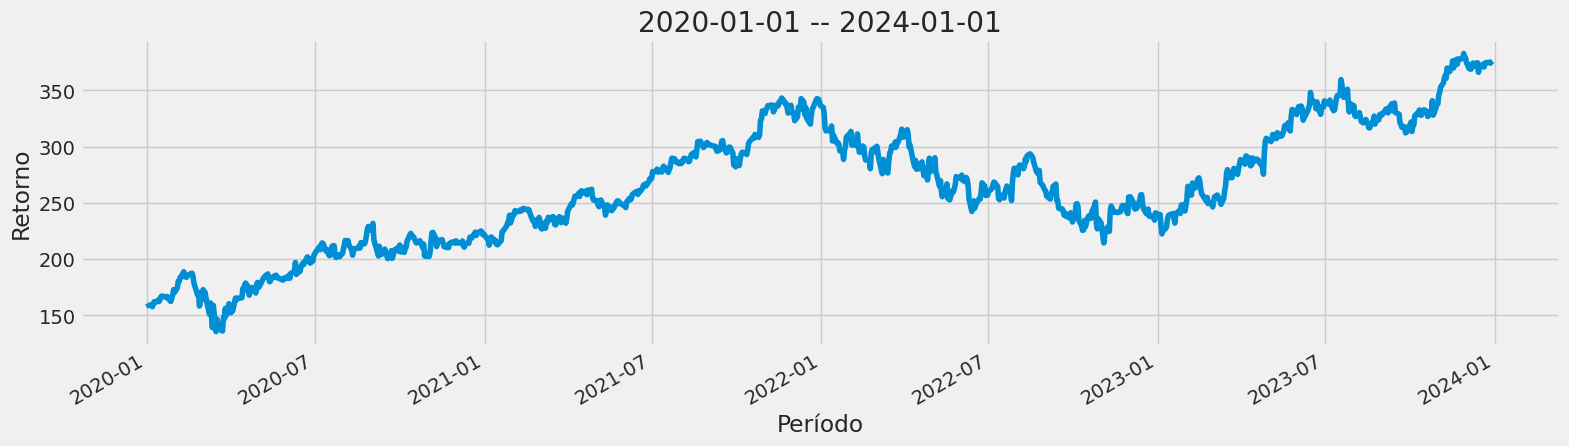

In [ ]:
data['Close'].plot(title = "2020-01-01 -- 2024-01-01", figsize=(17,4.5),xlabel='Período',ylabel='Retorno')

###Test de Dickey-Fuller

O Teste de Dickey-Fuller é uma prova estatística usada para determinar se uma série temporal é estacionária. A função adfuller da biblioteca statsmodels em Python facilita a realização de esta proba.

In [ ]:
from statsmodels.tsa.stattools import adfuller

def Augmented_Dickey_Fuller_Test_func(series , column_name):
    print (f'Resultados da proba de Dickey-Fuller para a coluna: {column_name}')
    dftest = adfuller(series, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','No Lags Used','Número de observações utilizadas'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)
    if dftest[1] <= 0.05:
        print("Conclução:====>")
        print("Rejeitar a hipótese nula")
        print("A série é estacionária")
    else:
        print("Conclução:====>")
        print("Não se pode rechazar a hipótese nula")
        print("A série não é estacionária")

Augmented_Dickey_Fuller_Test_func(data['Close'],'Close')

Resultados da proba de Dickey-Fuller para a coluna: Close
Test Statistic                       -1.086631
p-value                               0.720374
No Lags Used                          9.000000
Número de observações utilizadas    996.000000
Critical Value (1%)                  -3.436933
Critical Value (5%)                  -2.864446
Critical Value (10%)                 -2.568317
dtype: float64
Conclução:====>
Não se pode rechazar a hipótese nula
A série não é estacionária


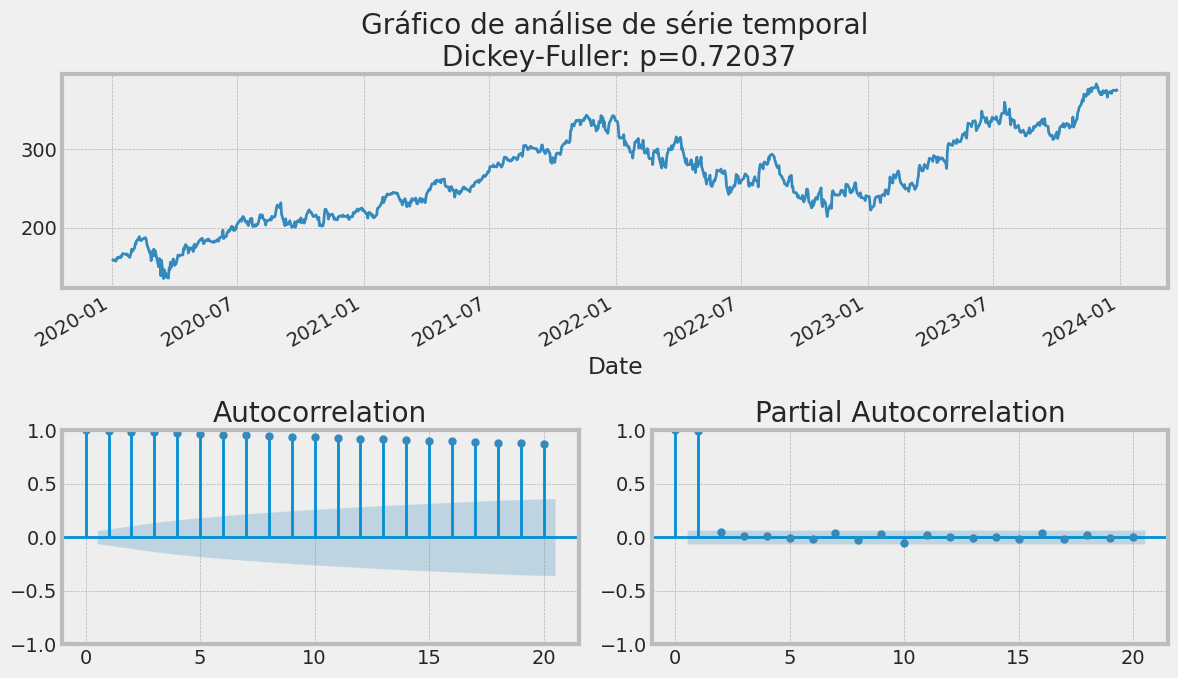

In [ ]:
import statsmodels.tsa.api as smt
import statsmodels.api as sm

def Dickey_Fuller_plot(y, lags=None, figsize=(12, 7), style='bmh'): # [3]
    if not isinstance(y, pd.Series):
        y = pd.Series(y)

    with plt.style.context(style):
        fig = plt.figure(figsize=figsize)
        layout = (2, 2)
        ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1, 0))
        pacf_ax = plt.subplot2grid(layout, (1, 1))

        y.plot(ax=ts_ax)
        p_value = sm.tsa.stattools.adfuller(y)[1]
        ts_ax.set_title('Gráfico de análise de série temporal\n Dickey-Fuller: p={0:.5f}'.format(p_value))
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
        plt.tight_layout()

Dickey_Fuller_plot(data["Close"], lags=20)

#2. Diferenciação fracionária

Fracdiff realiza a diferenciação fracionária de séries temporais, conforme apresentado em "Avanços em Machine Learning Financeiro" de M. Prado. A diferenciação fracionária processa séries temporais para torná-las estacionárias, preservando a memória da série original. Fracdiff oferece computação extremamente rápida e uma API compatível com scikit-learn.

Seja
$$
(1 - B)^d = 1 - dB + \frac{d(d-1)}{2!}B^2 - \frac{d(d-1)(d-2)}{3!}B^3 + \dots
$$

Considerando $d = 0.5$

In [ ]:
from fracdiff.sklearn import Fracdiff
f = Fracdiff(0.5)
df_1 = f.fit_transform(data['Close'].values.reshape(-1, 1))

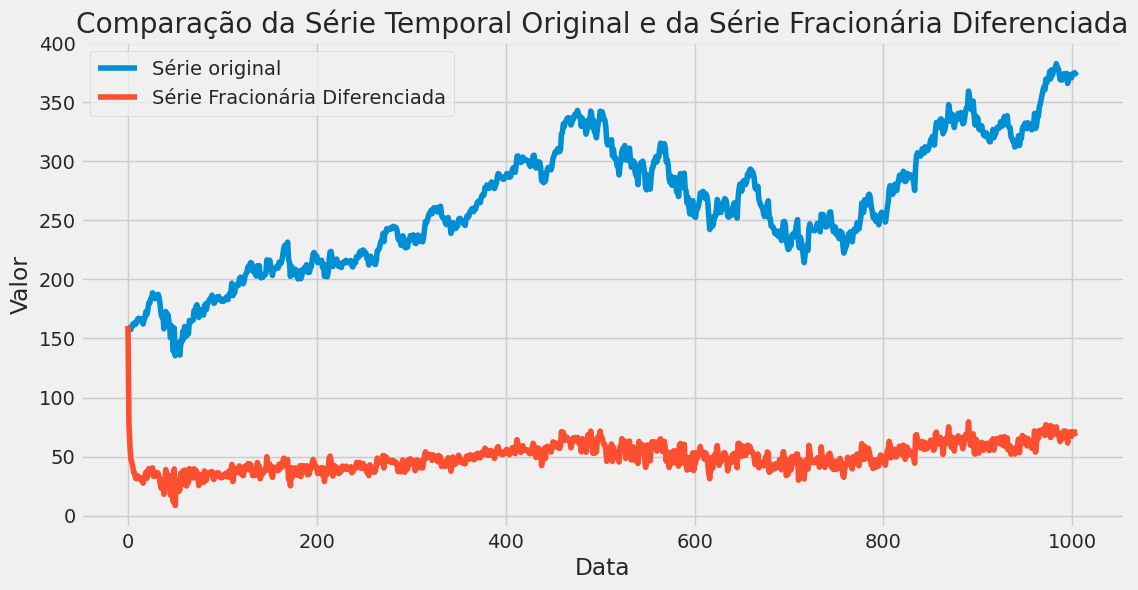

In [ ]:
# Graficar las series
plt.figure(figsize=(12, 6))
plt.plot(data['Close'].values, label='Série original')
plt.plot(df_1, label='Série Fracionária Diferenciada')
plt.legend()
plt.title('Comparação da Série Temporal Original e da Série Fracionária Diferenciada')
plt.xlabel('Data')
plt.ylabel('Valor')
plt.show()

Vejamos se a nossa série é estacionária.

In [ ]:
Augmented_Dickey_Fuller_Test_func(df_1,'Close')

Resultados da proba de Dickey-Fuller para a coluna: Close
Test Statistic                       -1.346675
p-value                               0.607557
No Lags Used                         17.000000
Número de observações utilizadas    988.000000
Critical Value (1%)                  -3.436986
Critical Value (5%)                  -2.864470
Critical Value (10%)                 -2.568330
dtype: float64
Conclução:====>
Não se pode rechazar a hipótese nula
A série não é estacionária


O test mostra que a série ainda não é estacionária, isto porque o valor de "d" não é o que se precisa para tranformar-lo em estacionária.

Para resolver isto, se usará FracdiffStat como veremos de aquí a poco.

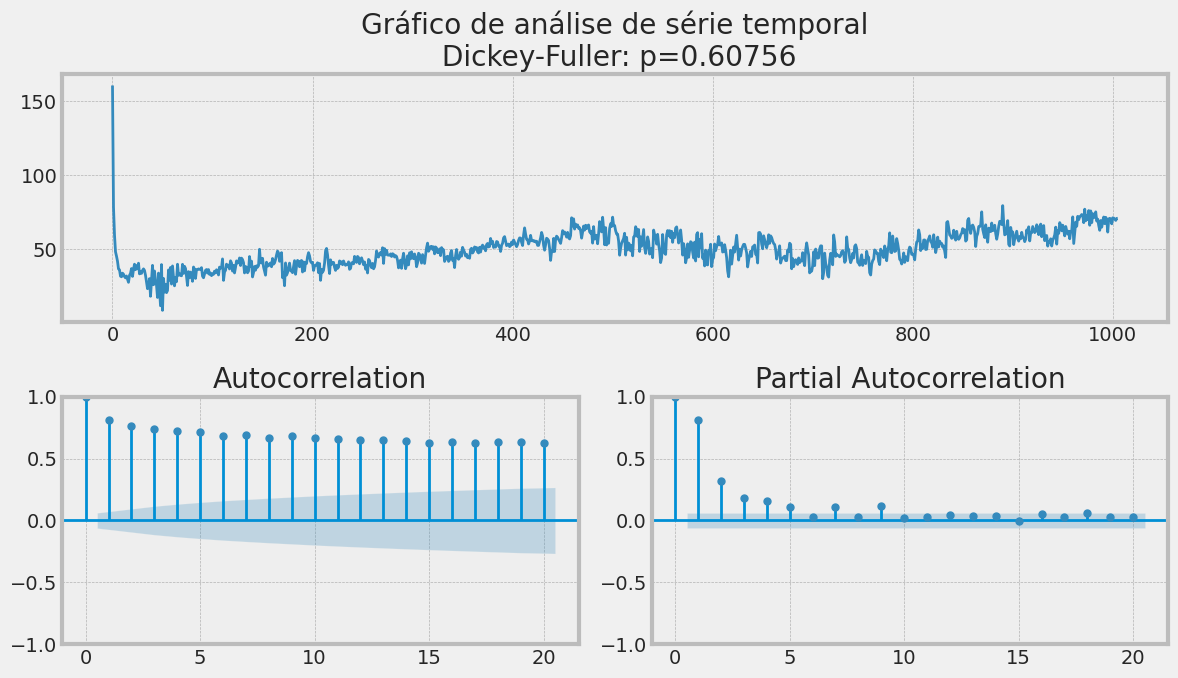

In [ ]:
Dickey_Fuller_plot([df_1[i][0] for i in range(len(df_1))], lags=20)

Diferenciação fracionária enquanto se preserva a memória

Uma classe de transformador FracdiffStat que encontra a ordem mínima de diferenciação fracionária que torna as séries temporais estacionárias. As séries temporais diferenciadas com essa ordem são obtidas aplicando-se posteriormente o método. Esta série é interpretada como uma série temporal estacionária que mantém a memória máxima da série temporal original.

In [ ]:
from fracdiff.sklearn import FracdiffStat
 # 2d time-series with shape (n_samples, n_features)
f = FracdiffStat()
df_2 = f.fit_transform(data['Close'].values.reshape(-1, 1))

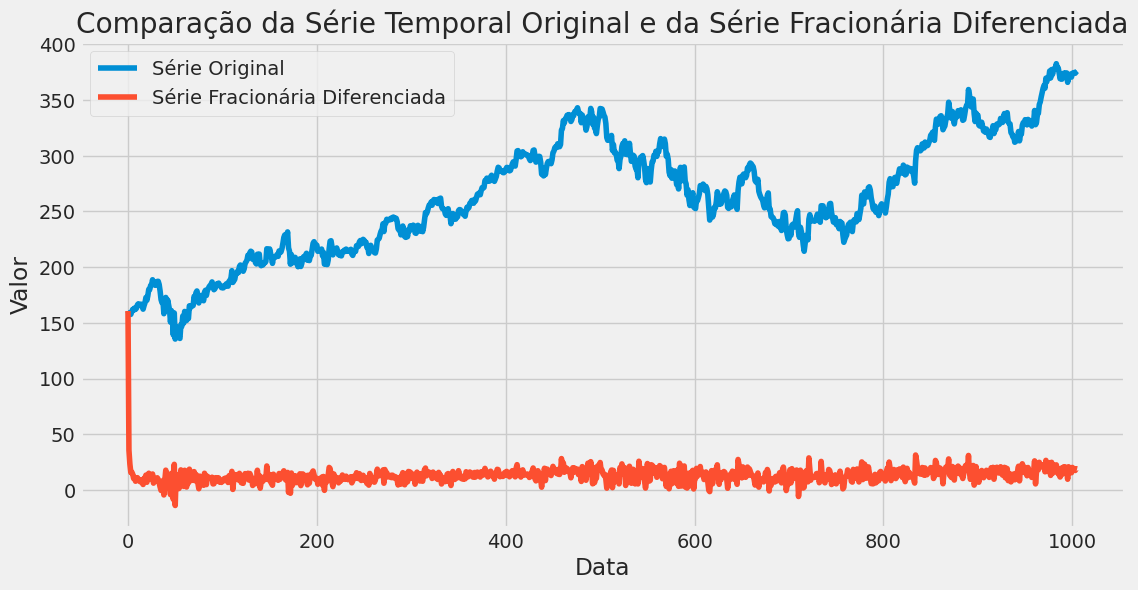

In [ ]:
# Graficar las series
plt.figure(figsize=(12, 6))
plt.plot(data['Close'].values, label='Série Original')
plt.plot(df_2, label='Série Fracionária Diferenciada')
plt.legend()
plt.title('Comparação da Série Temporal Original e da Série Fracionária Diferenciada')
plt.xlabel('Data')
plt.ylabel('Valor')
plt.show()

In [ ]:
Augmented_Dickey_Fuller_Test_func(df_2,'Close')

Resultados da proba de Dickey-Fuller para a coluna: Close
Test Statistic                       -2.866113
p-value                               0.049433
No Lags Used                         20.000000
Número de observações utilizadas    985.000000
Critical Value (1%)                  -3.437006
Critical Value (5%)                  -2.864479
Critical Value (10%)                 -2.568335
dtype: float64
Conclução:====>
Rejeitar a hipótese nula
A série é estacionária


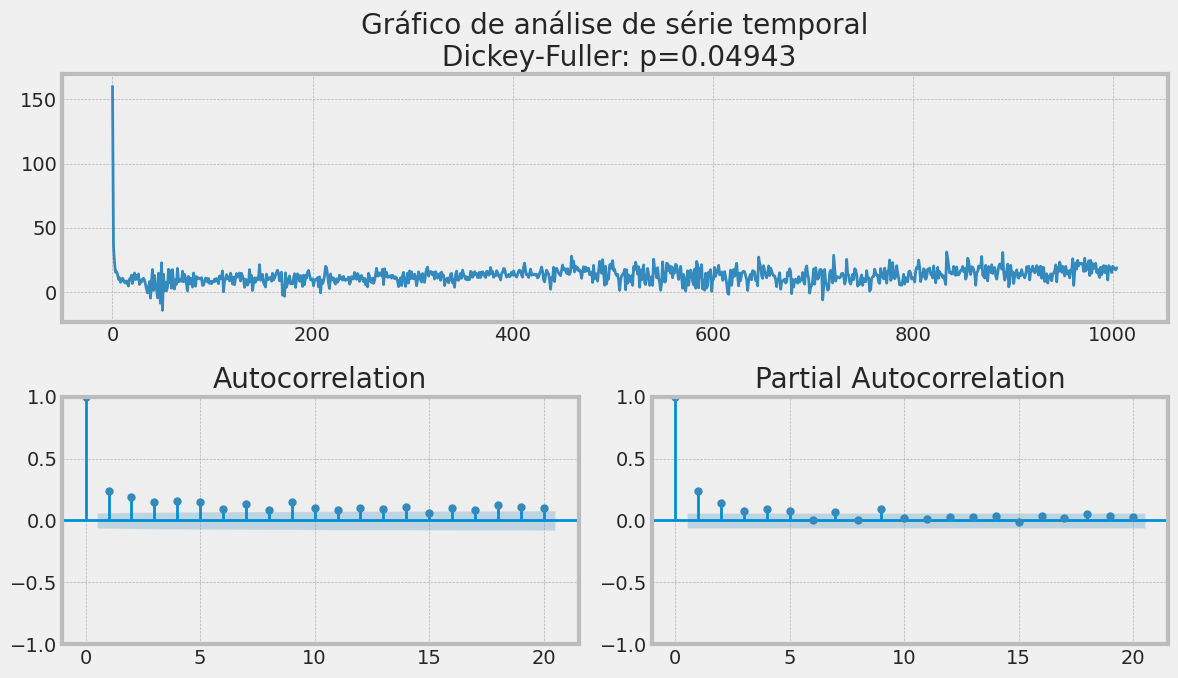

In [ ]:
Dickey_Fuller_plot([df_2[i][0] for i in range(len(df_2))], lags=20)

Onde o valor ótimo de "d" para obter uma série estacionária é dado por:

In [ ]:
#Con valor d
f.d_

array([0.765625])

#3. Análise de séries de tempo usando Keras

## **Redes neurais**
Uma rede neural artificial é uma estrutura em camadas de neurônios conectados, inspirada em redes neurais biológicas. Não é um algoritmo, mas combinações de vários algoritmos que nos permitem realizar operações complexas com dados.

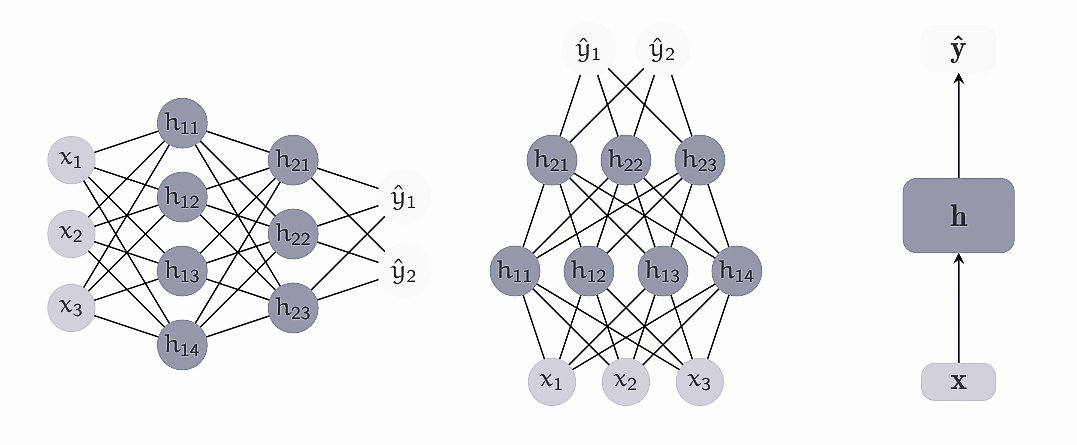

## **Redes neurais recurrentes**
É uma classe de redes neurais projetadas para lidar com dados temporais. Os neurônios das RNN têm um estado / memória celular, e a entrada é processada de acordo com esse estado interno, que é alcançado com a ajuda de loops na rede neural. Há módulos recorrentes de camadas 'tanh' nas RNN que lhes permitem reter informações. No entanto, não por muito tempo, por isso precisamos de modelos LSTM.

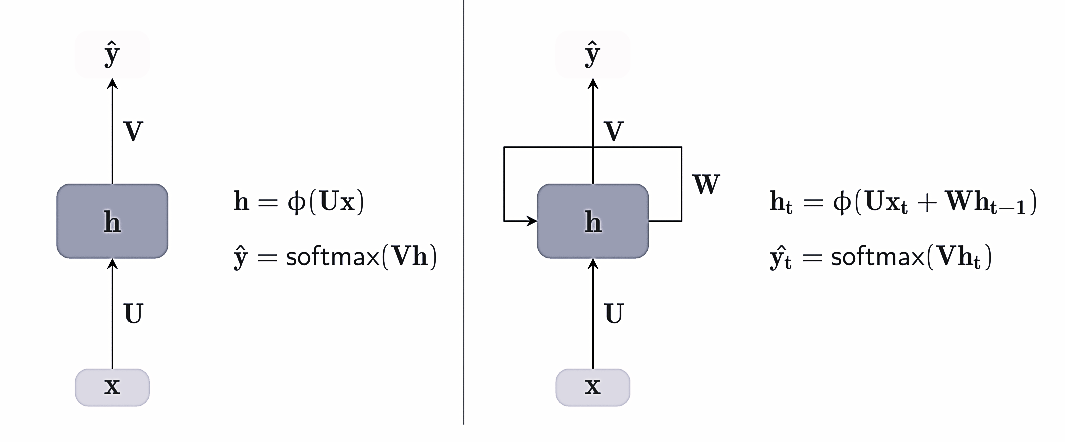

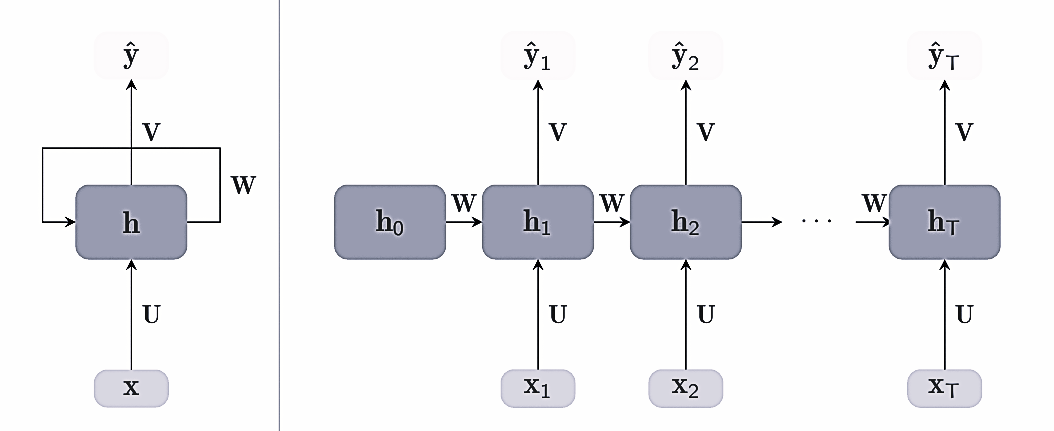

## 3.1. Caso unidimensional

Nesta primeira parte vamos a considerar o caso de tomar a coluna "Close" dos dados obtidos. Assím para predecir o valor de um día do valor de "Close", consideraremos os valores de "Close" dos últimos 7 días (uma semana).

In [ ]:
# Obtemos a data de AAPL
#end = datetime.now()
data = yf.download('MSFT', start='2020-01-01', end='2024-01-01')
data.columns = ['Adj Close','Close','High','Low','Open','Volume']
data.index = pd.to_datetime(data.index, format="%Y%m").to_period('D')
data.head()

[*********************100%***********************]  1 of 1 completed


,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2020-01-02,153.630707,160.619995,160.729996,158.330002,158.779999,22622100
2020-01-03,151.717697,158.619995,159.949997,158.059998,158.320007,21116200
2020-01-06,152.109894,159.029999,159.100006,156.509995,157.080002,20813700
2020-01-07,150.722977,157.580002,159.669998,157.320007,159.320007,21634100
2020-01-08,153.123734,160.089996,160.800003,157.949997,158.929993,27746500


<Axes: title={'center': '2020-01-01 -- 2024-01-01'}, xlabel='Período', ylabel='Retorno'>

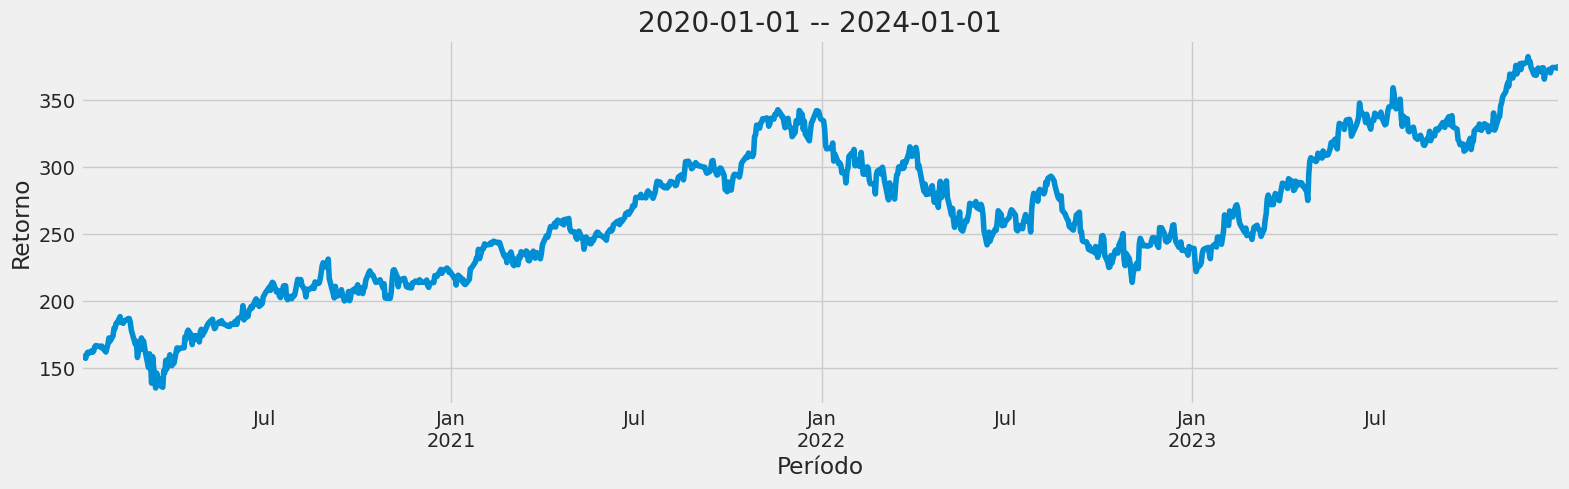

In [ ]:
data['Close'].plot(title = "2020-01-01 -- 2024-01-01", figsize=(17,4.5),xlabel='Período',ylabel='Retorno')

In [ ]:
#Estandarizando os dados, tomando como valores a avaliar a coluna "Close"
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data['Close'].values.reshape(-1, 1))

#Vamos a considerar um subconjunto para validar nosso resultado depois de treinar e testar
number_validation = 50

# Separando a data para train-test e validation
len_data_test = len(data_scaled)-number_validation
data_train_test = data_scaled[:len_data_test]
Y_prueba = data_scaled[len_data_test:]

#Transformando os dados num formato adecuado para usar redes neurais em Keras
def create_sequences(X, time_steps=7):
    X_s, y_s = [], []
    for i in range(len(X) - time_steps):
        X_s.append(X[i:i + time_steps])
        y_s.append(X[i + time_steps])
    return np.array(X_s), np.array(y_s)

time_steps = 7
X_seq, y_seq = create_sequences(data_train_test, time_steps)

#Criar os dados de entrenamiento y de test
train_size = int(len(X_seq) * 0.8)
X_train, X_test = X_seq[:train_size], X_seq[train_size:]
y_train, y_test = y_seq[:train_size], y_seq[train_size:]

Considerando primeiro o caso de usar uma red neural simples.

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import SimpleRNN, Dense

model = Sequential()
model.add(SimpleRNN(50, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')
# Ver resume do modelo
model.summary()
model.fit(X_train, y_train, epochs=100, batch_size=25, validation_split=0.2)

# Avaliando o modelo nos dados de proba
test_loss = model.evaluate(X_test, y_test)
print("Test Loss: ", test_loss)

from sklearn.metrics import mean_absolute_error, mean_squared_error

test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
Evaluate(y_test,test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
Evaluate(y_train,train_pred)

data_scaled_pruebas = data_scaled[len_data_test-time_steps:]

#Colocando no formato da rede neural e, keras
X_se = []
for i in range(len(data_scaled_pruebas) - time_steps):
    X_se.append(data_scaled_pruebas[i:i + time_steps])
X_se = np.array(X_se)

train_pred_prueba = model.predict(X_se)
print('Train set evaluation:\n_____________________________________')
Evaluate(Y_prueba,train_pred_prueba)

Model: "sequential_45"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn_45 (SimpleRNN)            │ (None, 50)                  │           2,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_45 (Dense)                     │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,651 (10.36 KB)

 Trainable params: 2,651 (10.36 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.7123 - val_loss: 0.0588
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0876 - val_loss: 0.0572
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0338 - val_loss: 0.0612
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0229 - val_loss: 0.0577
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0241 - val_loss: 0.0523
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0213 - val_loss: 0.0483
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0214 - val_loss: 0.0463
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0208 - val_loss: 0.0413
Epoch 9/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0186 - val_loss: 0.0408
Epoch 10/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0177 - val_loss: 0.0377
Epoch 11/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0193 - val_loss: 0.0350
Epoch 12/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.

Usaremos validação cruzada do tipo time_serie_split para comparar o RMSE promedio do modelo.

In [ ]:
!pip install scikeras

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import TimeSeriesSplit
from scikeras.wrappers import KerasRegressor

# Crear el divisor de series temporales
tscv = TimeSeriesSplit(n_splits=10)

def create_model():
    model = Sequential()
    model.add(SimpleRNN(50, input_shape=(X_train.shape[1], X_train.shape[2])))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Envolver el modelo en KerasRegressor
model = KerasRegressor(build_fn=create_model,  epochs=100, batch_size=25, validation_split=0.2, verbose=0)

# Realizar la validación cruzada
scores = cross_val_score(model, X_train, y_train, cv=tscv, scoring='neg_mean_squared_error',)

# Convertir las puntuaciones a positivo y calcular la media
mse_scores = -scores
mean_mse = np.mean(mse_scores)

print(f'Mean RMSE: {np.sqrt(mean_mse):.4f}')

Mean RMSE: 0.1014


Podemos ver que el Croos Validation nos dá um valor próximo dos resultados obtidos para os conjuntos de train e test.

In [ ]:
data.index = data.index.to_timestamp()
predictions1 = scaler.inverse_transform(test_pred)
predictions2 = scaler.inverse_transform(train_pred_prueba)

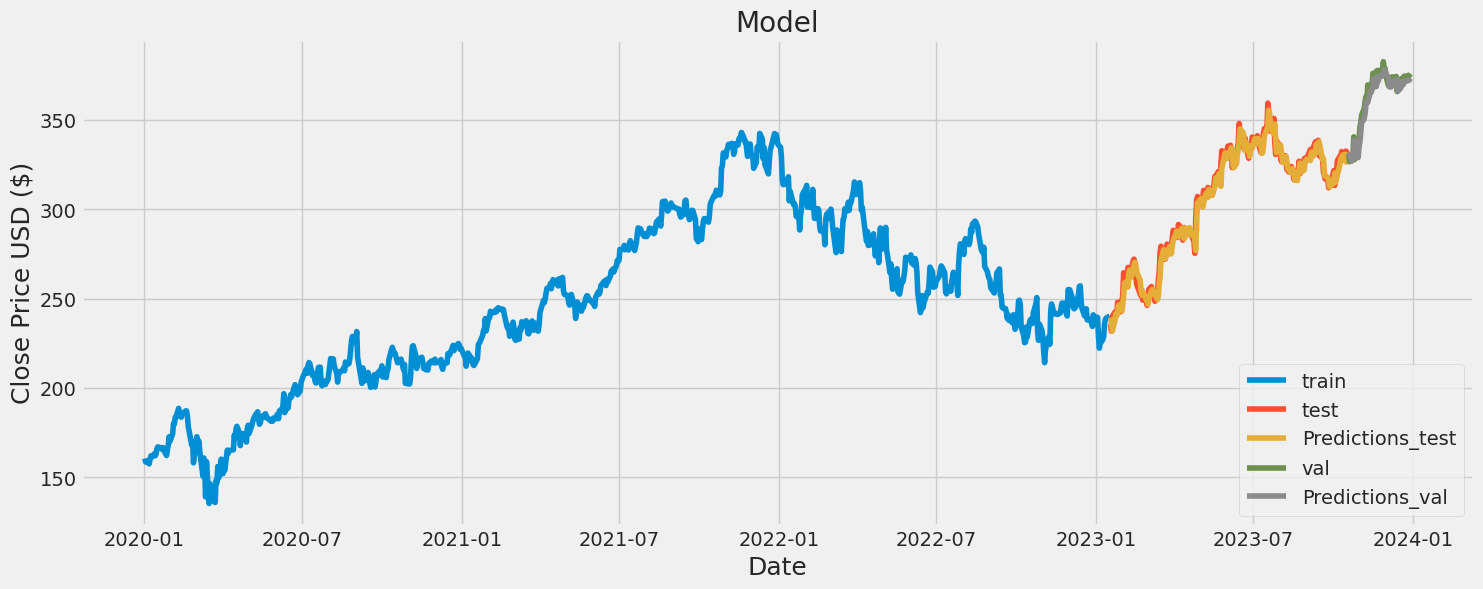

In [ ]:
# Plot the data
train = data[:time_steps + train_size]
valid1 = data[time_steps + train_size:len_data_test]
valid2 = data[len_data_test:]
valid1['Predictions1'] = predictions1
valid2['Predictions2'] = predictions2
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid1[['Close', 'Predictions1']])
plt.plot(valid2[['Close', 'Predictions2']])
plt.legend(['train', 'test', 'Predictions_test', 'val','Predictions_val'], loc='lower right')
plt.show()

Podemos ver o conjunto de validation mais perto.

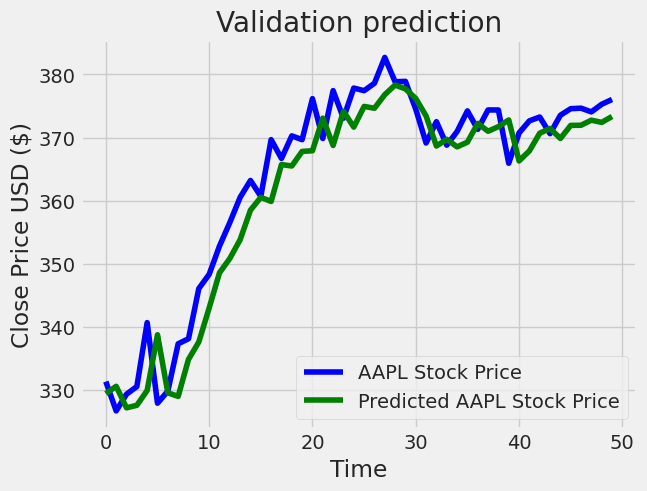

In [ ]:
plt.plot(valid2['Close'].values, color = 'blue', label = 'AAPL Stock Price')
plt.plot(valid2['Predictions2'].values, color = 'green', label = 'Predicted AAPL Stock Price')
plt.title('Validation prediction')
plt.xlabel('Time')
plt.ylabel('Close Price USD ($)')
plt.legend()
plt.show()

## **LSTM**
É um tipo especial de rede neural recorrente que é capaz de aprender dependências de longo prazo nos dados. Isso é alcançado porque o módulo recorrente do modelo tem uma combinação de quatro camadas que interagem entre si.
A continuação se mostra os tipos diferentes de objetivos que podemos resolver como uma red neural recorrente.

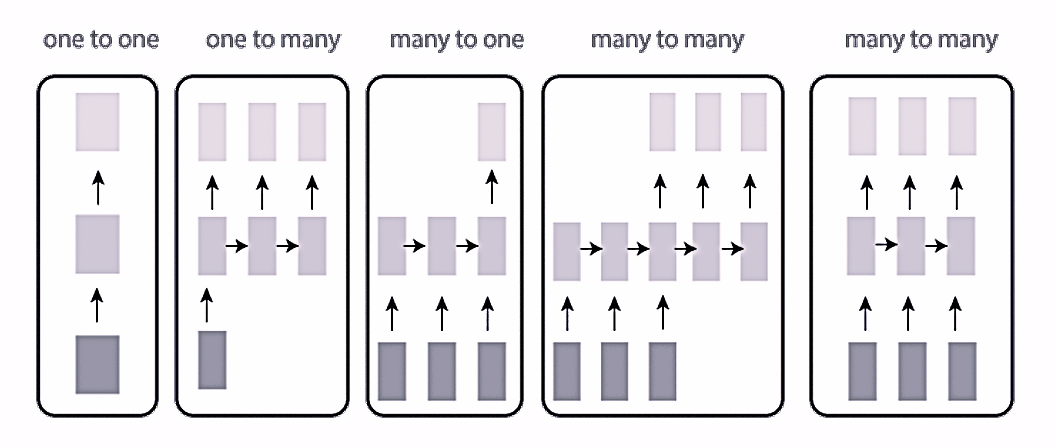

Para ver como se diferença uma LSTM de uma rede neural recurrente tradicional, se mostra o seguente gráfico.

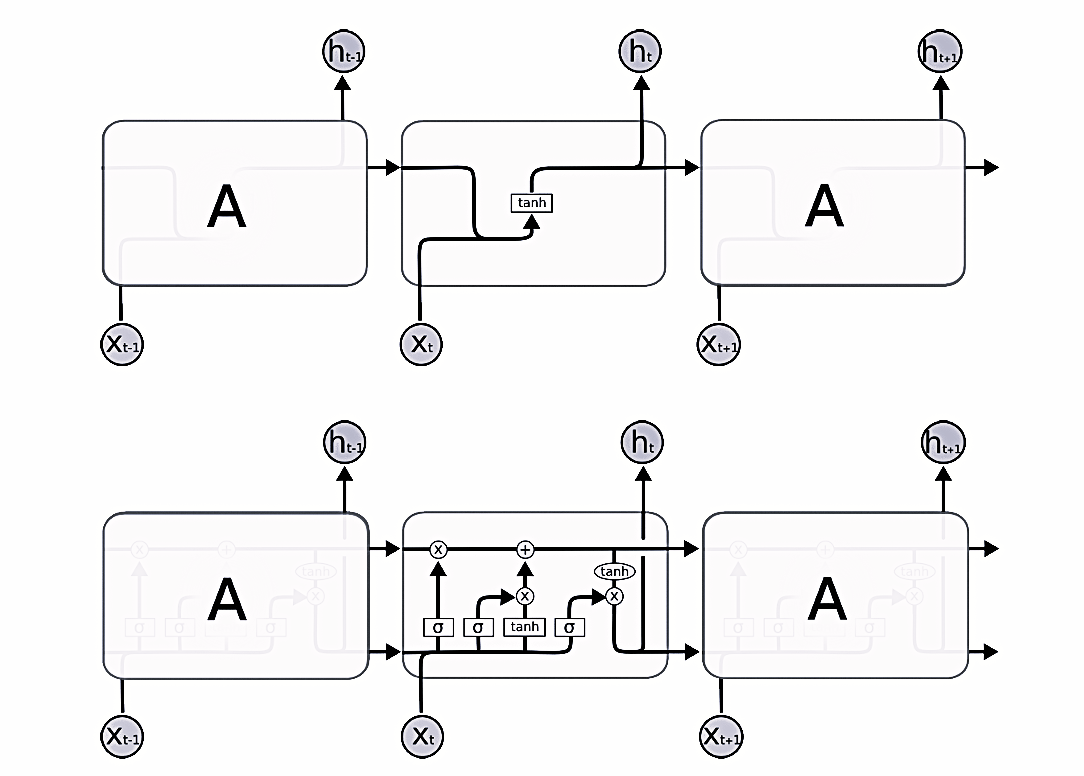

Vejamos que resultados obtemos usando este modelo.

In [ ]:
model = Sequential()
model.add(LSTM(units=50, input_shape=(X_train.shape[1], 1), return_sequences=True))
model.add(LSTM(units=50))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()
model.fit(X_train, y_train, epochs=100, batch_size=25, validation_split=0.2)

test_loss = model.evaluate(X_test, y_test)
print("Test Loss: ", test_loss)

from sklearn.metrics import mean_absolute_error, mean_squared_error

test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
Evaluate(y_test,test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
Evaluate(y_train,train_pred)

# Vejamos nos dados reais

train_pred_prueba = model.predict(X_se)
print('Test set evaluation:\n_____________________________________')
Evaluate(Y_prueba,train_pred_prueba)

Model: "sequential_66"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 7, 50)               │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_66 (Dense)                     │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 30,651 (119.73 KB)

 Trainable params: 30,651 (119.73 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - loss: 0.4292 - val_loss: 0.0324
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0266 - val_loss: 0.0385
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0239 - val_loss: 0.0367
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0220 - val_loss: 0.0346
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0207 - val_loss: 0.0347
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0199 - val_loss: 0.0329
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0201 - val_loss: 0.0347
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0177 - val_loss: 0.0318
Epoch 9/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0186 - val_loss: 0.0320
Epoch 10/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0209 - val_loss: 0.0305
Epoch 11/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0186 - val_loss: 0.0305
Epoch 12/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step

Obtendo ligeramente melhores resultados que só usando redes neurais simples.

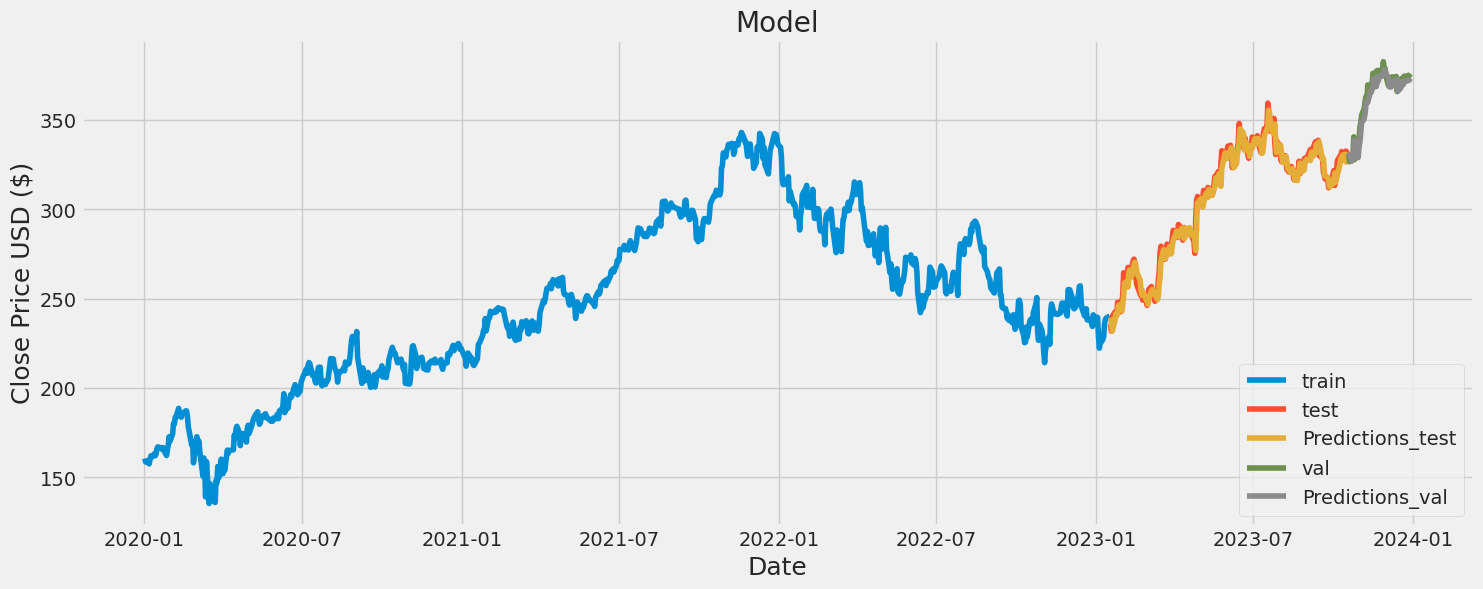

In [ ]:
# Plot the data
train = data[:time_steps + train_size]
valid1 = data[time_steps + train_size:len_data_test]
valid2 = data[len_data_test:]
valid1['Predictions1'] = predictions1
valid2['Predictions2'] = predictions2
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid1[['Close', 'Predictions1']])
plt.plot(valid2[['Close', 'Predictions2']])
plt.legend(['train', 'test', 'Predictions_test', 'val','Predictions_val'], loc='lower right')
plt.show()

Usaremos grid search para saber que "optimizer" é melhor.

In [ ]:
from sklearn.model_selection import GridSearchCV
tscv = TimeSeriesSplit(n_splits=10)

def create_model():
    # create model
    model = Sequential()
    model.add(LSTM(units=50, input_shape=(X_train.shape[1], 1), return_sequences=True))
    model.add(LSTM(units=50))
    model.add(Dense(units=1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model
model = KerasRegressor(build_fn=create_model, epochs=100, batch_size=25, verbose=0)
model.get_params()

{'model': None,
 'build_fn': <function __main__.create_model()>,
 'warm_start': False,
 'random_state': None,
 'optimizer': 'rmsprop',
 'loss': None,
 'metrics': None,
 'batch_size': 25,
 'validation_batch_size': None,
 'verbose': 0,
 'callbacks': None,
 'validation_split': 0.0,
 'shuffle': True,
 'run_eagerly': False,
 'epochs': 100}

In [ ]:
optimizer = ['SGD', 'RMSprop', 'Adagrad']
param_grid = dict(optimizer=optimizer)

grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=tscv, scoring='neg_mean_squared_error', n_jobs=1)
grid_result = grid.fit(X_train, y_train)

In [ ]:
#Resultados
print("Best: %f using %s" % (np.sqrt(-1*grid_result.best_score_), grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (np.sqrt(-1*mean), stdev, param))

Best: 0.121687 using {'optimizer': 'SGD'}
0.121687 (0.005413) with: {'optimizer': 'SGD'}
0.123073 (0.006392) with: {'optimizer': 'RMSprop'}
0.125357 (0.006134) with: {'optimizer': 'Adagrad'}


--------------------------------------------------------------------------------------

## 3.2. Caso multidimensional

Nesta segunda parte vamos vamos a considerar o caso de tomar a coluna "Close" como nosso target e criar indicadores financieros como varíaveis explicativas.

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving archivo.parquet to archivo.parquet


In [ ]:
data = pd.read_parquet('archivo.parquet')
data.columns = ['Volume', 'Vw', 'Open', 'Close', 'High', 'Low', 't', 'TRANSACTIONS',
       'a', 'op', 'DATE']
data.head()

,Volume,Vw,Open,Close,High,Low,t,TRANSACTIONS,a,op,DATE
0,14256.0,67.3454,67.3500,67.3375,67.3625,67.3275,1586261820000,45,NaN,NaN,2020-04-07 12:17:00
1,16552.0,67.3407,67.3501,67.3250,67.3625,67.3250,1586261880000,57,NaN,NaN,2020-04-07 12:18:00
2,80172.0,67.3937,67.3250,67.4225,67.4475,67.3250,1586261940000,149,NaN,NaN,2020-04-07 12:19:00
3,183740.0,67.3671,67.4475,67.3700,67.4700,67.3125,1586262000000,159,NaN,NaN,2020-04-07 12:20:00
4,35372.0,67.3469,67.3500,67.2975,67.3850,67.2975,1586262060000,102,NaN,NaN,2020-04-07 12:21:00


Obtendo dados obtidos em minutos. A idea vai ser utilizar uma janela de uma hora para poder treinar os dados e logo fazer as prediçoes.

In [ ]:
import talib as talib

In [ ]:
# Calcular indicadores

# Retornos de Precio de Cierre
data['CLOSE_returns'] = data['Close'].pct_change()
data['CLOSE_log_returns'] = np.log(data['Close'] / data['Close'].shift(1))
data['CLOSE_price_change'] = data['Close'].diff()
data['CLOSE_pct_change'] = data['Close'].pct_change()

# RA_5, RA_10: Lista de precios de cierre en los últimos 5 y 10 días
data['RA_5'] = data['Close'].rolling(window=5).mean()
data['RA_10'] = data['Close'].rolling(window=10).mean()

# AMPL: Rango de precios
data['AMPL'] = data['High'] - data['Low']

# OPNCLS: Diferencia entre precio de apertura y cierre
data['OPNCLS'] = data['Open'] - data['Close']

# Medias Móviles
data['MA_5'] = talib.SMA(data['Close'], timeperiod=5)
data['MA_10'] = talib.SMA(data['Close'], timeperiod=10)

# Medias Móviles de Volumen
data['V_MA_5'] = talib.SMA(data['Volume'], timeperiod=5)
data['V_MA_10'] = talib.SMA(data['Volume'], timeperiod=10)
data['V_MA_20'] = talib.SMA(data['Volume'], timeperiod=20)

# KAMA (Média Móvel Adaptativa de Kaufman)
data['KAMA_w10p(02,30)'] = talib.KAMA(data['Close'], timeperiod=10)

# PPO (Oscilador de Porcentagem de Preço)
# Calcular PPO (Oscilador de Porcentagem de Preço)
data['PPO_w(26,12)'] = talib.PPO(data['Close'], fastperiod=12, slowperiod=26, matype=0)
# Tasa de cambio del volumen
data['PVO'] = (data['Volume'].diff(periods=26) / data['Volume'].shift(26)) * 100
# Señal PVO (media móvil de 9 periodos del PVO)
data['PVO_signal'] = data['PVO'].rolling(window=9).mean()
# Histograma PVO
data['PVO_hist'] = data['PVO'] - data['PVO_signal']

# ROC (Tasa de cambio)
data['ROC_w12'] = talib.ROC(data['Close'], timeperiod=12)

# RSI (Índice de Fuerza Relativa)
data['RSI_w14'] = talib.RSI(data['Close'], timeperiod=14)

# Estocástico
data['%K'], data['%D'] = talib.STOCH(data['High'], data['Low'], data['Close'], fastk_period=14, slowk_period=3, slowk_matype=0, slowd_period=3, slowd_matype=0)
data['SO_w14s03'] = data['%K']
data['SOsgn_w14s03'] = data['%D']

# Calcular RSI convencional
data['RSI'] = talib.RSI(data['Close'], timeperiod=14)

# Función para calcular StRSI
def stochrsi(series, window):
    min_val = series.rolling(window=window).min()
    max_val = series.rolling(window=window).max()
    stochrsi = (series - min_val) / (max_val - min_val) * 100
    return stochrsi

# Calcular StRSI
data['StRSI_w14'] = stochrsi(data['RSI'], 14)
data['StRSIk_w14s(03,03)'] = data['StRSI_w14'].rolling(window=3).mean()
data['StRSId_w14s(03,03)'] = data['StRSIk_w14s(03,03)'].rolling(window=3).mean()


# Calcular AOI (Awesome Oscillator Indicator)
data['AOI_w(05,34)'] = (data['High'] + data['Low']) / 2
data['AOI_w(05,34)'] = data['AOI_w(05,34)'].rolling(window=5).mean() - data['AOI_w(05,34)'].rolling(window=34).mean()

# Parámetros del TSI
r = 25
s = 13

# Calcular las diferencias del precio de cierre
df_aux = data['Close'].diff()

# Medias móviles exponenciales
df_aux = abs(df_aux)

df_aux1 = df_aux.ewm(span=r, adjust=False).mean().ewm(span=s, adjust=False).mean()
df_aux2 = df_aux.ewm(span=r, adjust=False).mean().ewm(span=s, adjust=False).mean()

# Calcular TSI
data['TSI'] = 100 * df_aux1 / df_aux2

# ADX (Índice Direccional Medio)
data['ADX_w14'] = talib.ADX(data['High'], data['Low'], data['Close'], timeperiod=14)
data['ADXP_w14'] = talib.PLUS_DI(data['High'], data['Low'], data['Close'], timeperiod=14)
data['ADXN_w14'] = talib.MINUS_DI(data['High'], data['Low'], data['Close'], timeperiod=14)

# CCI (Índice de Canal de Commodities)
data['CCI_w20'] = talib.CCI(data['High'], data['Low'], data['Close'], timeperiod=20)

# EMA (Media Móvil Exponencial)
data['EMA_w14'] = talib.EMA(data['Close'], timeperiod=14)

# SMA (Media Móvil Simple)
data['SMA_w14'] = talib.SMA(data['Close'], timeperiod=14)

# MACD (Convergencia/Divergencia de Medias Móviles)
data['MACD'], data['MACD_Signal'], data['MACD_Hist'] = talib.MACD(data['Close'], fastperiod=12, slowperiod=26, signalperiod=9)

# Parabólico SAR (PSAR)
data['PSAR_s(0.02,0.2)'] = talib.SAR(data['High'], data['Low'], acceleration=0.02, maximum=0.2)
# Determinar la dirección del PSAR
data['PSARD_s(0.02,0.2)'] = np.where(data['Close'] > data['PSAR_s(0.02,0.2)'], 'Up', 'Down')
# Calcular el cambio de dirección
data['PSARDI_s(0.02,0.2)'] = data['PSARD_s(0.02,0.2)'].ne(data['PSARD_s(0.02,0.2)'].shift())
# Calcular el valor del PSAR en caso de tendencia alcista
data['PSARU_s(0.02,0.2)'] = np.where(data['PSARD_s(0.02,0.2)'] == 'Up', data['PSAR_s(0.02,0.2)'], np.nan)
# Calcular el cambio en el valor del PSAR alcista
data['PSARUI_s(0.02,0.2)'] = data['PSARU_s(0.02,0.2)'].ne(data['PSARU_s(0.02,0.2)'].shift())


# Calcular los componentes del Ichimoku Cloud
data_aux_1 = (data['High'].rolling(window=9).max() + data['Low'].rolling(window=9).min()) / 2
data_aux_2 = (data['High'].rolling(window=26).max() + data['Low'].rolling(window=26).min()) / 2
data['Senkou_Span_A'] = ((data_aux_1 + data_aux_2) / 2).shift(26)
data['Senkou_Span_B'] = ((data['High'].rolling(window=52).max() + data['Low'].rolling(window=52).min()) / 2).shift(26)
data['Chikou_Span'] = data['Close'].shift(-26)

data['ICHIBL_w(09,26,52)'] = data['Senkou_Span_B']
data['ICHICL_w(09,26,52)'] = data['Chikou_Span']

# Calcular KST (Know Sure Thing)
def kst(data, r1, r2, r3, r4, w1, w2, w3, w4):
    roc1 = data.pct_change(periods=r1) * 100
    roc2 = data.pct_change(periods=r2) * 100
    roc3 = data.pct_change(periods=r3) * 100
    roc4 = data.pct_change(periods=r4) * 100
    kst = (roc1.rolling(window=w1).mean() +
           roc2.rolling(window=w2).mean() * 2 +
           roc3.rolling(window=w3).mean() * 3 +
           roc4.rolling(window=w4).mean() * 4)
    return kst

data['KST_r(10,15,20,30)_w(10,10,10,15)'] = kst(data['Close'], 10, 15, 20, 30, 10, 10, 10, 15)
data['KSTS_r(10,15,20,30)_w(10,10,10,15)'] = data['KST_r(10,15,20,30)_w(10,10,10,15)'].rolling(window=9).mean()
data['KSTD_r(10,15,20,30)_w(10,10,10,15)'] = data['KST_r(10,15,20,30)_w(10,10,10,15)'] - data['KSTS_r(10,15,20,30)_w(10,10,10,15)']

# Calcular el Ultimate Oscillator (UO)
data['UO_wi(07,14,28)wg(4.0,2.0,1.0)'] = talib.ULTOSC(data['High'], data['Low'], data['Close'],
                                                     timeperiod1=7, timeperiod2=14, timeperiod3=28)

data['WRI_14'] = talib.RSI(data['Close'], timeperiod=14)
data['ADI'] = talib.ADOSC(data['High'], data['Low'], data['Close'], data['Volume'], fastperiod=3, slowperiod=10)
data['CMF_w20'] = talib.ADOSC(data['High'], data['Low'], data['Close'], data['Volume'], fastperiod=20, slowperiod=20)
# Calcular EOM (Ease of Movement)
midpoint_move = (data['High'] + data['Low']) / 2 - (data['High'].shift(1) + data['Low'].shift(1)) / 2
box_ratio = (data['Volume'] / 1e8) / (data['High'] - data['Low'])
data['EOM_w14'] = (midpoint_move / box_ratio).rolling(window=14).mean()

data['EMV_w14'] = (midpoint_move / box_ratio).rolling(window=14).mean()
data['FI_w13'] = talib.EMA(data['Close'].diff() * data['Volume'], timeperiod=13)
data['MFI_w14'] = talib.MFI(data['High'], data['Low'], data['Close'], data['Volume'], timeperiod=14)
data['NVI'] = (data['Volume'] < data['Volume'].shift(1)) * data['Close']
# Calcular VWAP (Volume Weighted Average Price)
vwap = (data['Volume'] * (data['High'] + data['Low'] + data['Close']) / 3).cumsum() / data['Volume'].cumsum()
data['VWAP_w14'] = vwap.rolling(window=14).mean()
# Calcular Aroon
data['AROOND_w25'], data['AROONU_w25'] = talib.AROON(data['High'], data['Low'], timeperiod=25)
data['AROON_w25'] = data['AROONU_w25'] - data['AROOND_w25']
# Calcular DPO (Detrended Price Oscillator)
dpo_offset = int(20 / 2 + 1)
data['DPO_w20'] = data['Close'] - data['Close'].shift(dpo_offset).rolling(window=20).mean()

# TRIX (Media Móvil Triple Exponencial)
data['TRIX_w15'] = talib.TRIX(data['Close'], timeperiod=15)

# WMA (Media Móvil Ponderada)
data['WMA_w09'] = talib.WMA(data['Close'], timeperiod=9)

# Volume Indicators
data['OBV'] = talib.OBV(data['Close'], data['Volume'])
data['VPT'] = talib.LINEARREG(data['Volume'], timeperiod=14)

# Calcular diferencias entre los máximos y mínimos
data_aux_3 = data['High'] - data['Low']

# Calcular medias móviles exponenciales (EMA)
ema_9 = data_aux_3.ewm(span=9, adjust=False).mean()
ema_25 = ema_9.ewm(span=25, adjust=False).mean()

# Calcular Mass Index (MI)
data['MI_w(09,25)'] = (ema_9 / ema_25).rolling(window=25).sum()

# Imprimir resultados
print(data[['Close', 'MI_w(09,25)']].tail())

def stc(data, window_slow=50, window_fast=23, cycle=10, smooth1=3, smooth2=3):
    macd = talib.MACD(data, fastperiod=window_fast, slowperiod=window_slow)[0]
    k = ((macd - macd.rolling(window=cycle).min()) /
         (macd.rolling(window=cycle).max() - macd.rolling(window=cycle).min())) * 100
    d = k.rolling(window=smooth1).mean()
    stc = d.rolling(window=smooth2).mean()
    return stc

data['STC_w(50,23)c10s(03,03)'] = stc(data['Close'])
# Calcular Vortex Indicator (VI)
data['VI_w14'] = talib.APO(data['Close'], fastperiod=14, slowperiod=28, matype=0)

# Índice Direccional Positivo y Negativo del Vortex Indicator
data['VIN_w14'] = talib.MINUS_DI(data['High'], data['Low'], data['Close'], timeperiod=14)
data['VIP_w14'] = talib.PLUS_DI(data['High'], data['Low'], data['Close'], timeperiod=14)
data.head()

         Close  MI_w(09,25)
416383  170.97    37.037991
416384  170.95    38.445779
416385  170.94    39.582958
416386  170.89    40.580372
416387  170.90    40.610396


,Volume,Vw,Open,Close,High,Low,t,TRANSACTIONS,a,op,...,DPO_w20,TRIX_w15,WMA_w09,OBV,VPT,"MI_w(09,25)","STC_w(50,23)c10s(03,03)",VI_w14,VIN_w14,VIP_w14
0,14256.0,67.3454,67.3500,67.3375,67.3625,67.3275,1586261820000,45,NaN,NaN,...,NaN,NaN,NaN,14256.0,NaN,NaN,NaN,NaN,NaN,NaN
1,16552.0,67.3407,67.3501,67.3250,67.3625,67.3250,1586261880000,57,NaN,NaN,...,NaN,NaN,NaN,-2296.0,NaN,NaN,NaN,NaN,NaN,NaN
2,80172.0,67.3937,67.3250,67.4225,67.4475,67.3250,1586261940000,149,NaN,NaN,...,NaN,NaN,NaN,77876.0,NaN,NaN,NaN,NaN,NaN,NaN
3,183740.0,67.3671,67.4475,67.3700,67.4700,67.3125,1586262000000,159,NaN,NaN,...,NaN,NaN,NaN,-105864.0,NaN,NaN,NaN,NaN,NaN,NaN
4,35372.0,67.3469,67.3500,67.2975,67.3850,67.2975,1586262060000,102,NaN,NaN,...,NaN,NaN,NaN,-141236.0,NaN,NaN,NaN,NaN,NaN,NaN


Vamos ver se existem valores nulos ou vacios.

<Axes: >

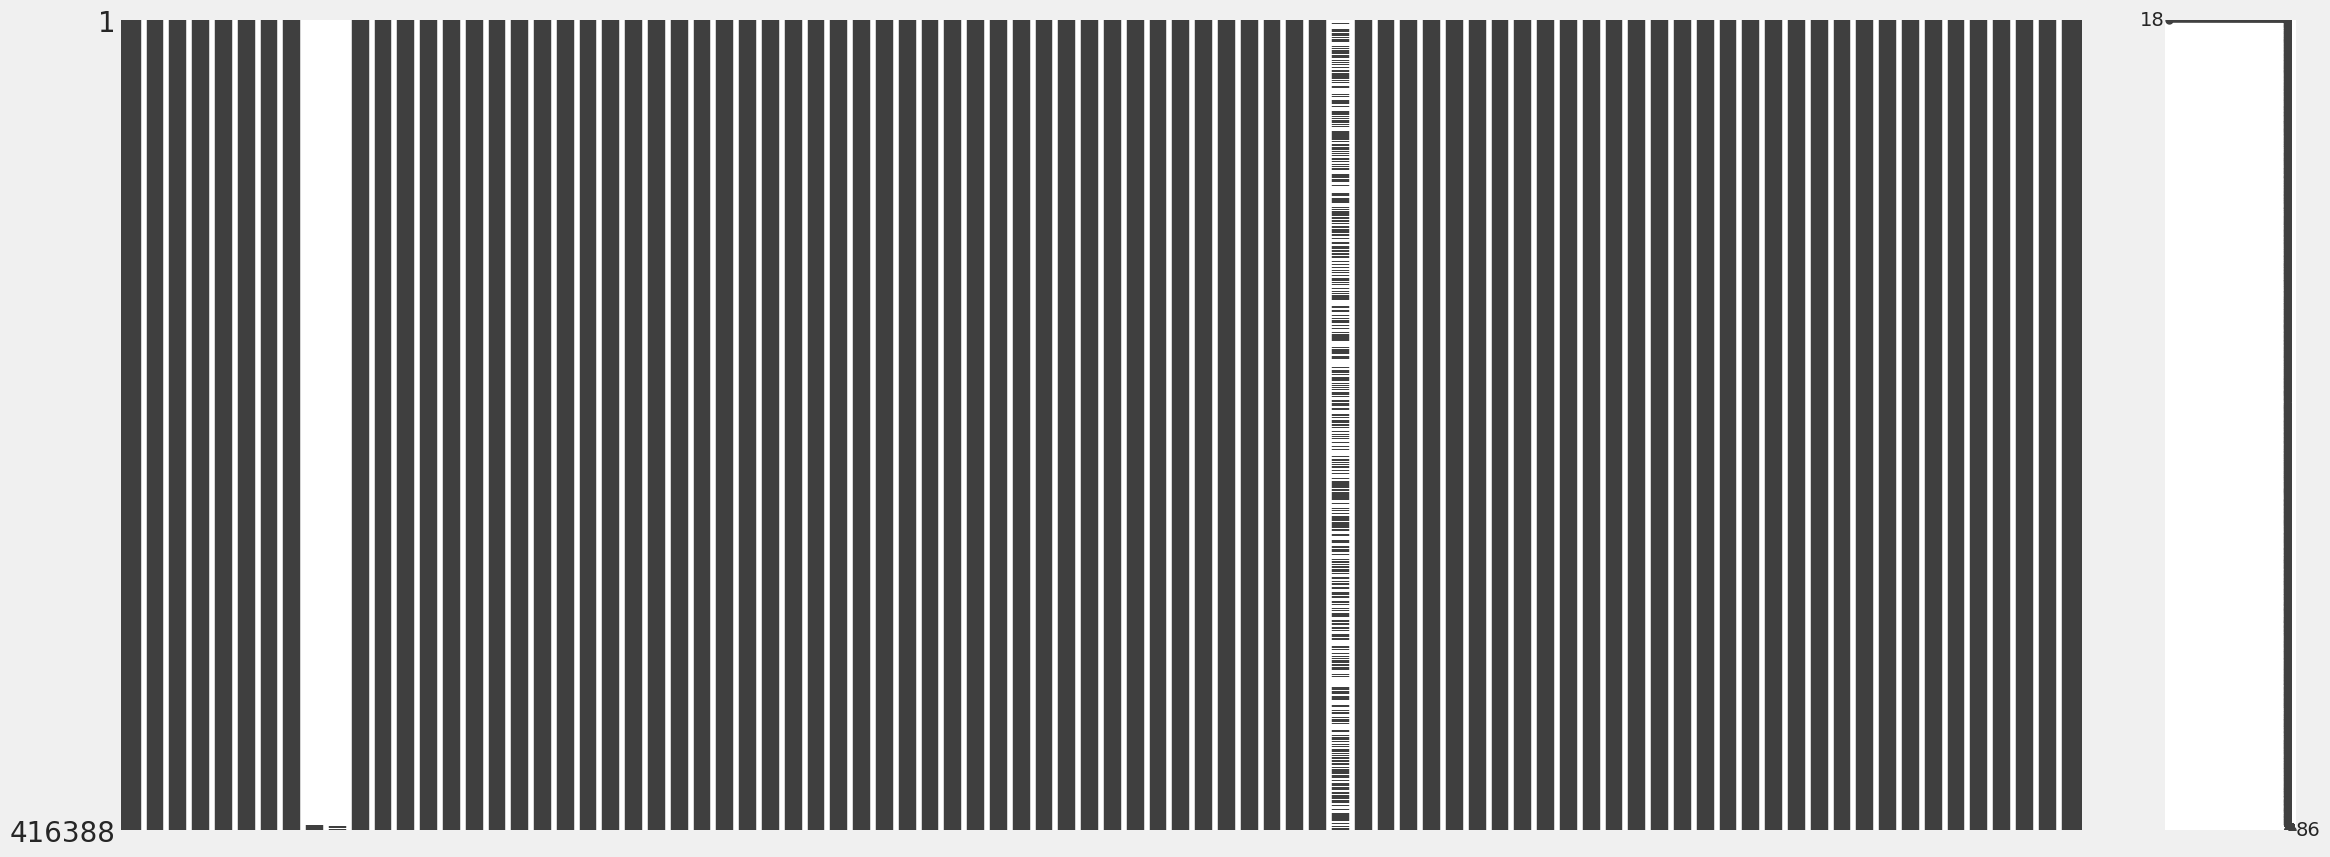

In [ ]:
import missingno as msno
msno.matrix(data)

In [ ]:
# Verificar columnas con valores nulos
nulos_por_columna = data.isnull().sum()

# Filtrar solo las columnas que tienen valores nulos
columnas_con_nulos = nulos_por_columna[nulos_por_columna > 100]

# Imprimir resultados
print(columnas_con_nulos)


a                    413967
op                   414711
PSARU_s(0.02,0.2)    203972
dtype: int64


In [ ]:
df = data.drop(['a','op','PSARU_s(0.02,0.2)'], axis=1)
df = df.dropna()
df

,Volume,Vw,Open,Close,High,Low,t,TRANSACTIONS,DATE,CLOSE_returns,...,DPO_w20,TRIX_w15,WMA_w09,OBV,VPT,"MI_w(09,25)","STC_w(50,23)c10s(03,03)",VI_w14,VIN_w14,VIP_w14
77,1290388.0,66.9114,66.8237,66.8913,66.9950,66.7950,1586266440000,3489,2020-04-07 13:34:00,0.001010,...,-0.697950,-0.005428,67.229207,-7.243300e+06,2.343427e+06,33.542854,0.0,-0.053221,35.842478,8.476241
78,1260400.0,66.8158,66.8900,66.8125,66.9063,66.7500,1586266500000,3529,2020-04-07 13:35:00,-0.001178,...,-0.781125,-0.010371,67.115213,-8.503700e+06,2.277969e+06,34.667738,0.0,-0.085275,35.328228,7.858105
79,957712.0,66.8912,66.8263,66.9350,66.9525,66.8150,1586266560000,2803,2020-04-07 13:36:00,0.001833,...,-0.660630,-0.015070,67.044053,-7.545988e+06,2.099357e+06,35.671100,0.0,-0.115275,33.006387,9.510480
80,1024540.0,67.0140,66.9450,67.0400,67.0625,66.9275,1586266620000,2742,2020-04-07 13:37:00,0.001569,...,-0.557755,-0.019073,67.009227,-6.521448e+06,1.912245e+06,36.504327,0.0,-0.138846,30.897632,14.108658
81,1009864.0,66.9353,67.0384,66.8350,67.0550,66.8200,1586266680000,3026,2020-04-07 13:38:00,-0.003058,...,-0.765255,-0.022993,66.949733,-7.531312e+06,1.693580e+06,37.249880,0.0,-0.170721,32.485661,12.599607
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
416357,345.0,171.6334,171.6400,171.6400,171.6400,171.6400,1649287500000,7,2022-04-06 23:25:00,0.000233,...,-0.045500,-0.000238,171.637333,1.070650e+09,3.048571e+02,16.203489,0.0,-0.019286,43.838886,37.641767
416358,355.0,171.6005,171.5900,171.5900,171.5900,171.5900,1649287560000,13,2022-04-06 23:26:00,-0.000291,...,-0.099500,-0.000433,171.626667,1.070650e+09,2.223429e+02,14.765026,0.0,-0.019643,50.586376,33.119288
416359,218.0,171.6003,171.6000,171.6000,171.6000,171.6000,1649287620000,4,2022-04-06 23:27:00,0.000058,...,-0.090500,-0.000626,171.619556,1.070650e+09,5.997143e+01,13.526474,0.0,-0.023929,49.310351,34.806333
416360,837.0,171.5899,171.5900,171.5900,171.5900,171.5900,1649287680000,8,2022-04-06 23:28:00,-0.000058,...,-0.099500,-0.000820,171.611778,1.070649e+09,1.169143e+02,12.493255,0.0,-0.027143,50.650921,33.885823


<Axes: title={'center': 'Preços por minuto'}, xlabel='Período', ylabel='Retorno'>

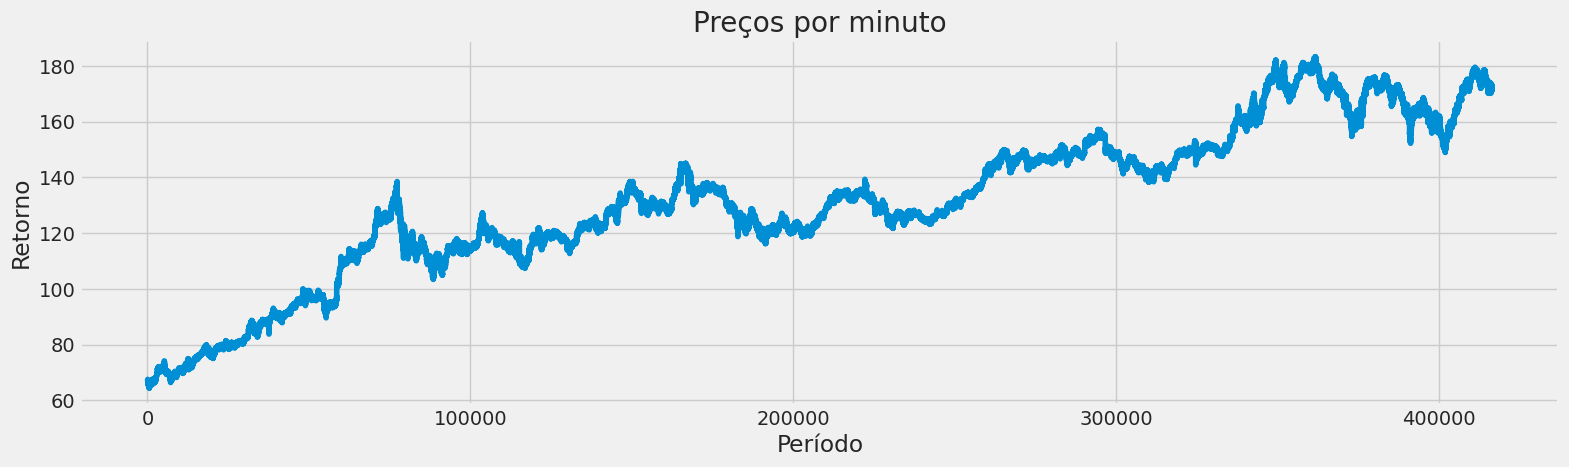

In [ ]:
df['Close'].plot(title = "Preços por minuto", figsize=(17,4.5),xlabel='Período',ylabel='Retorno')

In [ ]:
df.columns

Index(['Volume', 'Vw', 'Open', 'Close', 'High', 'Low', 't', 'TRANSACTIONS',
       'DATE', 'CLOSE_returns', 'CLOSE_log_returns', 'CLOSE_price_change',
       'CLOSE_pct_change', 'RA_5', 'RA_10', 'AMPL', 'OPNCLS', 'MA_5', 'MA_10',
       'V_MA_5', 'V_MA_10', 'V_MA_20', 'KAMA_w10p(02,30)', 'PPO_w(26,12)',
       'PVO', 'PVO_signal', 'PVO_hist', 'ROC_w12', 'RSI_w14', '%K', '%D',
       'SO_w14s03', 'SOsgn_w14s03', 'RSI', 'StRSI_w14', 'StRSIk_w14s(03,03)',
       'StRSId_w14s(03,03)', 'AOI_w(05,34)', 'TSI', 'ADX_w14', 'ADXP_w14',
       'ADXN_w14', 'CCI_w20', 'EMA_w14', 'SMA_w14', 'MACD', 'MACD_Signal',
       'MACD_Hist', 'PSAR_s(0.02,0.2)', 'PSARD_s(0.02,0.2)',
       'PSARDI_s(0.02,0.2)', 'PSARUI_s(0.02,0.2)', 'Senkou_Span_A',
       'Senkou_Span_B', 'Chikou_Span', 'ICHIBL_w(09,26,52)',
       'ICHICL_w(09,26,52)', 'KST_r(10,15,20,30)_w(10,10,10,15)',
       'KSTS_r(10,15,20,30)_w(10,10,10,15)',
       'KSTD_r(10,15,20,30)_w(10,10,10,15)', 'UO_wi(07,14,28)wg(4.0,2.0,1.0)',
       'WRI_1

In [ ]:
y = df['Close'].values
#Se definen los valores independientes para nuestro nuevo modelo
X=df[['CLOSE_returns', 'CLOSE_log_returns', 'CLOSE_price_change',
       'CLOSE_pct_change', 'RA_5', 'RA_10', 'AMPL', 'OPNCLS', 'MA_5', 'MA_10',
       'V_MA_5', 'V_MA_10', 'V_MA_20', 'KAMA_w10p(02,30)', 'PPO_w(26,12)',
       'PVO', 'PVO_signal', 'PVO_hist', 'ROC_w12', 'RSI_w14', '%K', '%D',
       'SO_w14s03', 'SOsgn_w14s03', 'RSI', 'StRSI_w14', 'StRSIk_w14s(03,03)',
       'StRSId_w14s(03,03)', 'AOI_w(05,34)', 'TSI', 'ADX_w14', 'ADXP_w14',
       'ADXN_w14', 'CCI_w20', 'EMA_w14', 'SMA_w14', 'MACD', 'MACD_Signal',
       'MACD_Hist', 'PSAR_s(0.02,0.2)', 'PSARD_s(0.02,0.2)',
       'PSARDI_s(0.02,0.2)', 'PSARUI_s(0.02,0.2)', 'Senkou_Span_A',
       'Senkou_Span_B', 'Chikou_Span', 'ICHIBL_w(09,26,52)',
       'ICHICL_w(09,26,52)', 'KST_r(10,15,20,30)_w(10,10,10,15)',
       'KSTS_r(10,15,20,30)_w(10,10,10,15)',
       'KSTD_r(10,15,20,30)_w(10,10,10,15)', 'UO_wi(07,14,28)wg(4.0,2.0,1.0)',
       'WRI_14', 'ADI', 'CMF_w20', 'EOM_w14', 'EMV_w14', 'FI_w13', 'MFI_w14',
       'NVI', 'VWAP_w14', 'AROOND_w25', 'AROONU_w25', 'AROON_w25', 'DPO_w20',
       'TRIX_w15', 'WMA_w09', 'OBV', 'VPT', 'MI_w(09,25)',
       'STC_w(50,23)c10s(03,03)', 'VI_w14', 'VIN_w14', 'VIP_w14']]

In [ ]:

# Seleccionar as columnas con dtype('O')
columnas_objeto = X.select_dtypes(include=['object'])

print("Colunas onde ou tipo de dados são 'object':")
print(columnas_objeto.columns)

from sklearn.preprocessing import OneHotEncoder

# Aplicar OneHotEncoder a colunas categóricas
encoder = OneHotEncoder(sparse_output=False)
X_categorical = encoder.fit_transform(X.select_dtypes(include=['object']))

# Converta o resultado em DataFrame e combine com colunas numéricas
X_categorical_df = pd.DataFrame(X_categorical, columns=encoder.get_feature_names_out(data.select_dtypes(include=['object']).columns))
X_numeric = X.select_dtypes(include=[float, int])
X = pd.concat([X_numeric.reset_index(drop=True), X_categorical_df.reset_index(drop=True)], axis=1)

Colunas onde ou tipo de dados são 'object':
Index(['PSARD_s(0.02,0.2)'], dtype='object')


In [ ]:
from keras.layers import Dense, Input
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import SimpleRNN, Dense
from sklearn.preprocessing import MinMaxScaler
# Escalar os dados, tomando a coluna “Fechar” como valores a serem avaliados

X=X.values
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

def create_sequences(X, y, time_steps=10):
    X_s, y_s = [], []
    for i in range(len(X) - time_steps):
        X_s.append(X[i:i + time_steps])
        y_s.append(y[i + time_steps])
    return np.array(X_s), np.array(y_s)

time_steps = 10
X_seq, y_seq = create_sequences(X, y, time_steps)

In [ ]:
# Divida o conjunto de dados em treinamento e teste
train_size = int(len(X_seq) * 0.8)
X_train, X_test = X_seq[:train_size], X_seq[train_size:]
y_train, y_test = y_seq[:train_size], y_seq[train_size:]

In [ ]:
# Crie o modelo RNN
model = Sequential()
model.add(Input(shape=(X_train.shape[1], X_train.shape[2])))  # Input shape (10, números de características)
model.add(LSTM(units=50,return_sequences=True)) #50 neuronios usando LSTM
model.add(Dropout(0.2)) #Para elmininar casos desnecesarios
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()
model.fit(X_train, y_train, epochs=10, batch_size=100, validation_split=0.2)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 10, 50)              │          24,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 10, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 45,051 (175.98 KB)

 Trainable params: 45,051 (175.98 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
2665/2665 ━━━━━━━━━━━━━━━━━━━━ 59s 21ms/step - loss: 6909.5898 - val_loss: 2011.1460
Epoch 2/10
2665/2665 ━━━━━━━━━━━━━━━━━━━━ 57s 21ms/step - loss: 502.4654 - val_loss: 861.5251
Epoch 3/10
2665/2665 ━━━━━━━━━━━━━━━━━━━━ 54s 20ms/step - loss: 107.8009 - val_loss: 135.5848
Epoch 4/10
2665/2665 ━━━━━━━━━━━━━━━━━━━━ 82s 20ms/step - loss: 72.1883 - val_loss: 38.1003
Epoch 5/10
2665/2665 ━━━━━━━━━━━━━━━━━━━━ 83s 21ms/step - loss: 68.1492 - val_loss: 18.9168
Epoch 6/10
2665/2665 ━━━━━━━━━━━━━━━━━━━━ 79s 20ms/step - loss: 64.9092 - val_loss: 15.4959
Epoch 7/10
2665/2665 ━━━━━━━━━━━━━━━━━━━━ 73s 27ms/step - loss: 63.3442 - val_loss: 9.1537
Epoch 8/10
2665/2665 ━━━━━━━━━━━━━━━━━━━━ 72s 27ms/step - loss: 61.5976 - val_loss: 7.1303
Epoch 9/10
2665/2665 ━━━━━━━━━━━━━━━━━━━━ 82s 27ms/step - loss: 59.8504 - val_loss: 7.6094
Epoch 10/10
2665/2665 ━━━━━━━━━━━━━━━━━━━━ 76s 25ms/step - loss: 58.8316 - val_loss: 7.0185


In [ ]:
# Avaliando o modelo em dados de teste
test_loss = model.evaluate(X_test, y_test)
print("Test Loss: ", test_loss)

from sklearn.metrics import mean_absolute_error, mean_squared_error

# Fazendo previsões
test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
Evaluate(y_test,test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
Evaluate(y_train,train_pred)

2602/2602 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - loss: 421.0725
Test Loss:  487.1294250488281
2602/2602 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step
10407/10407 ━━━━━━━━━━━━━━━━━━━━ 40s 4ms/step
Test set evaluation:
_____________________________________
MAE: 20.670291434832826
MSE: 487.1299713529642
RMSE: 22.071021076356306
R2 Square -7.13709803544797
Train set evaluation:
_____________________________________
MAE: 0.8568015058176816
MSE: 1.7979758423502068
RMSE: 1.3408862152883096
R2 Square 0.9961929635393764


Estes resultados mostram como nosso modelo se está sobreajustando aos dados de treinamento. Também temos que mencionar que estamos usando poucas épocas de treinamento, isto por a pouca capacidade de memoria no momento de usar google colab, mas a segunda parte do trabalho, vamos a realizar con mais épocas e com uma janela maior de una hora.

In [ ]:
# Criando un dataframe para comparar nossa prediçao com os dados reais
y_pred = [test_pred[i][0] for i in range(len(test_pred))]
df_comparando = pd.DataFrame({'ypred':y_pred, 'ytest':y_test})
df_comparando

,ypred,ytest
0,147.442474,149.9199
1,147.448639,149.9500
2,147.368134,149.9232
3,147.328110,149.9200
4,147.284119,149.9140
...,...,...
83250,147.645493,171.6400
83251,147.646790,171.5900
83252,147.644379,171.6000
83253,147.645111,171.5900


VAmos ver como funciona uma regreçao linear para nossos dados, para comparar os resultados.

In [ ]:
# Convertir numa forma bidimensional
n_samples, time_steps, n_features = X_seq.shape[0],X_seq.shape[1],X_seq.shape[2]
X_reshaped = X_seq.reshape(n_samples, time_steps * n_features)

print("Dimensiones del array X después de la transformación:", X_reshaped.shape)

Dimensiones del array X después de la transformación: (416275, 730)


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.linear_model import LinearRegression

# Esta parte é para guardar uma boa data para o treinamento
len_data_test = len(X_reshaped)-50
X_prueba = X_reshaped[len_data_test:]
X_reshaped = X_reshaped[:len_data_test]
y_prueba = y_seq[len_data_test:]
y_seq = y_seq[:len_data_test]

train_size = int(len(X_reshaped) * 0.8)
X_train, X_test = X_reshaped[:train_size], X_reshaped[train_size:]
y_train, y_test = y_seq[:train_size], y_seq[train_size:]

In [ ]:
len(y_prueba)

0

In [ ]:
# Crear una instancia del modelo
model = LinearRegression(fit_intercept=False)

# Entrenar el modelo
model.fit(X_train, y_train)
# Hacer predicciones en el conjunto de prueba
test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
Evaluate(y_test,test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
Evaluate(y_train,train_pred)



Test set evaluation:
_____________________________________
MAE: 0.07771153195781463
MSE: 0.01559920216285235
RMSE: 0.12489676602239287
R2 Square 0.9997401585856672
Train set evaluation:
_____________________________________
MAE: 0.0503282002021239
MSE: 0.007465079241643531
RMSE: 0.08640069005305184
R2 Square 0.9999841922786957


In [ ]:
train_pred_prueba = model.predict(X_prueba)
print('Train set evaluation:\n_____________________________________')
Evaluate(y_prueba,train_pred_prueba)

Train set evaluation:
_____________________________________
MAE: 0.031931935306798775
MSE: 0.00158532956756077
RMSE: 0.039816197301610436
R2 Square 0.347751313458304


Observando melhores resultados que nosso modelo LSTM tanto para o conjunto de train como de test, mas nao tao bom no conjunto de prova.

Nesta primeira parte do trabalho, nosso objetivo foi mostrar o lado técnico das ferramentas que vamos usar. Assim, na segunda parte do trabalho, mostramos nosso resultado já utilizando os dados otimizados pelo grupo de limpeza dos dados e, além disso, fazendo diferenciação fracionária nas variáveis explicativas, obtendo melhores resultados.

----------------------------------------------------------------------------------------------------------